# DMBDA Project: Unsupervised and supervised mining
## Group No.: 5
___

## Unsupervised mining

### Importing data

In [1]:
import os
os.chdir('/content/drive/MyDrive/dmbda_project')

In [2]:
import numpy as np
import pandas as pd
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.cluster import KMeans
from functions import *
from functions import plot_dendrogram
from scipy.cluster.hierarchy import linkage, fcluster

In [3]:
#import data

mfeat_fou = pd.read_csv("mfeat-fou.csv", header = None)
mfeat_fac = pd.read_csv("mfeat-fac.csv", header = None)
mfeat_kar = pd.read_csv("mfeat-kar.csv", header = None)
mfeat_pix = pd.read_csv("mfeat-pix.csv", header = None)
mfeat_zer = pd.read_csv("mfeat-zer.csv", header = None)
mfeat_mor = pd.read_csv("mfeat-mor.csv", header = None)

### Processing data

In [4]:
#assigning attribute names to each file
mfeat_fou.columns = ['fou'+str(i) for i in range(len(mfeat_fou.columns))]
mfeat_fac.columns = ['fac'+str(i) for i in range(len(mfeat_fac.columns))]
mfeat_kar.columns = ['kar'+str(i) for i in range(len(mfeat_kar.columns))]
mfeat_pix.columns = ['pix'+str(i) for i in range(len(mfeat_pix.columns))]
mfeat_zer.columns = ['zer'+str(i) for i in range(len(mfeat_zer.columns))]
mfeat_mor.columns = ['mor'+str(i) for i in range(len(mfeat_mor.columns))]

In [5]:
mfeat_fou

fou0      fou1      fou2      fou3      fou4      fou5      fou6  \
0     0.065882  0.197312  0.103826  0.270362  0.616078  0.035856  0.424572   
1     0.049142  0.175971  0.105515  0.227095  0.599280  0.041217  0.431078   
2     0.034172  0.227649  0.108766  0.127697  0.612494  0.056554  0.470639   
3     0.062336  0.217979  0.080243  0.289592  0.546316  0.045779  0.425545   
4     0.061970  0.198358  0.111239  0.253460  0.608455  0.023631  0.415246   
...        ...       ...       ...       ...       ...       ...       ...   
1995  0.171874  0.221525  0.426470  0.077220  0.264413  0.220274  0.452574   
1996  0.152025  0.347439  0.323534  0.087706  0.427077  0.313656  0.371549   
1997  0.335606  0.318426  0.257948  0.225381  0.417769  0.123067  0.333455   
1998  0.253910  0.171202  0.302622  0.181066  0.326383  0.167960  0.417409   
1999  0.271575  0.149037  0.232753  0.197720  0.236424  0.187395  0.467213   

          fou7      fou8      fou9  ...     fou66     fou67     fou68  \
0     0.089701  0.367773  0.037065  ...  0.123448  0.113374  0.074343   
1     0.096801  0.326739  0.059661  ...  0.045310  0.069337  0.045386   
2     0.041903  0.324267  0.044569  ...  0.019858  0.218842  0.041087   
3     0.022841  0.331454  0.119052  ...  0.083995  0.085479  0.087658   
4     0.091866  0.309310  0.049142  ...  0.021004  0.106960  0.032283   
...        ...       ...       ...  ...       ...       ...       ...   
1995  0.161113  0.356788  0.081889  ...  0.108996  0.197440  0.197778   
1996  0.262768  0.396422  0.124391  ...  0.212160  0.161606  0.033621   
1997  0.342044  0.398151  0.079550  ...  0.236628  0.121659  0.316333   
1998  0.399065  0.266153  0.097131  ...  0.155442  0.168154  0.147167   
1999  0.385117  0.191292  0.149162  ...  0.140143  0.225634  0.061724   

         fou69     fou70     fou71     fou72     fou73     fou74     fou75  
0     0.281666  0.067795  0.344182  0.038963  0.394366  0.049971  0.344871  
1     0.254264  0.045447  0.335659  0.021719  0.445277  0.083978  0.354092  
2     0.360464  0.047154  0.377408  0.052099  0.445029  0.071234  0.261465  
3     0.151880  0.075950  0.293462  0.022675  0.408291  0.063010  0.401376  
4     0.248565  0.015674  0.386276  0.039481  0.434701  0.069218  0.405403  
...        ...       ...       ...       ...       ...       ...       ...  
1995  0.205866  0.138887  0.160848  0.126190  0.247345  0.239117  0.136807  
1996  0.173155  0.295227  0.259417  0.345691  0.068303  0.158352  0.282327  
1997  0.244846  0.132893  0.042988  0.250740  0.141576  0.038776  0.114591  
1998  0.268675  0.199125  0.128708  0.285220  0.230322  0.103664  0.130003  
1999  0.267944  0.251182  0.170772  0.322067  0.275769  0.021074  0.085241  

[2000 rows x 76 columns]

In [6]:
#We remove the duplicated columns
mfeat_fou = mfeat_fou.loc[~mfeat_fou.index.duplicated(keep='first')]
mfeat_fac = mfeat_fac.loc[~mfeat_fac.index.duplicated(keep='first')]
mfeat_kar = mfeat_kar.loc[~mfeat_kar.index.duplicated(keep='first')]
mfeat_pix = mfeat_pix.loc[~mfeat_pix.index.duplicated(keep='first')]
mfeat_zer = mfeat_zer.loc[~mfeat_zer.index.duplicated(keep='first')]
mfeat_mor = mfeat_mor.loc[~mfeat_mor.index.duplicated(keep='first')]

### Concatenation of the 6 files among the columns to use the whole data

In [7]:
#We concat the 6 files among the columns
data = pd.concat([mfeat_fou, mfeat_fac, mfeat_kar, mfeat_pix, mfeat_zer, mfeat_mor], axis=1, join='inner', ignore_index=False)

In [8]:
data

fou0      fou1      fou2      fou3      fou4      fou5      fou6  \
0     0.065882  0.197312  0.103826  0.270362  0.616078  0.035856  0.424572   
1     0.049142  0.175971  0.105515  0.227095  0.599280  0.041217  0.431078   
2     0.034172  0.227649  0.108766  0.127697  0.612494  0.056554  0.470639   
3     0.062336  0.217979  0.080243  0.289592  0.546316  0.045779  0.425545   
4     0.061970  0.198358  0.111239  0.253460  0.608455  0.023631  0.415246   
...        ...       ...       ...       ...       ...       ...       ...   
1995  0.171874  0.221525  0.426470  0.077220  0.264413  0.220274  0.452574   
1996  0.152025  0.347439  0.323534  0.087706  0.427077  0.313656  0.371549   
1997  0.335606  0.318426  0.257948  0.225381  0.417769  0.123067  0.333455   
1998  0.253910  0.171202  0.302622  0.181066  0.326383  0.167960  0.417409   
1999  0.271575  0.149037  0.232753  0.197720  0.236424  0.187395  0.467213   

          fou7      fou8      fou9  ...      zer43       zer44      zer45  \
0     0.089701  0.367773  0.037065  ...   9.711070   20.007248  47.032578   
1     0.096801  0.326739  0.059661  ...   8.140633   44.536711  46.338954   
2     0.041903  0.324267  0.044569  ...   4.530921   26.292170  44.574822   
3     0.022841  0.331454  0.119052  ...   3.706023   13.432311  51.739930   
4     0.091866  0.309310  0.049142  ...   1.806273   23.689300  50.407770   
...        ...       ...       ...  ...        ...         ...        ...   
1995  0.161113  0.356788  0.081889  ...   8.672527  152.791625  43.559482   
1996  0.262768  0.396422  0.124391  ...   1.389084  161.716981  53.922259   
1997  0.342044  0.398151  0.079550  ...   4.643621  101.472040  37.013903   
1998  0.399065  0.266153  0.097131  ...  16.109266  126.684436  41.154583   
1999  0.385117  0.191292  0.149162  ...   3.125481  160.045243  43.653824   

           zer46  mor0  mor1  mor2        mor3      mor4         mor5  
0     539.208457   1.0   0.0   0.0  133.150861  1.311693  1620.221779  
1     518.496567   1.0   0.0   0.0  126.724861  1.302745  1609.334822  
2     549.912691   1.0   0.0   0.0  131.173861  1.319031  1568.978435  
3     574.887814   1.0   0.0   0.0  129.478861  1.270878  1695.055281  
4     492.227513   1.0   0.0   0.0  127.262861  1.329637  1647.720235  
...          ...   ...   ...   ...         ...       ...          ...  
1995  501.537544   1.0   1.0   1.0  157.498861  1.655794  5326.025889  
1996  482.428339   1.0   1.0   1.0  152.404861  1.620345  5243.267754  
1997  430.544358   1.0   1.0   1.0  134.672861  1.541987  3766.763222  
1998  571.426195   1.0   1.0   1.0  142.926861  1.426381  4118.327320  
1999  408.171415   1.0   1.0   1.0  133.920861  1.564621  3808.021317  

[2000 rows x 649 columns]

### Principal Component Analysis

In [9]:
#We replace unknown values by the mean of the variable
data = data.fillna(data.mean())
X = data.values
# names = data["idCours"] # or data.index
names = data.index
features = data.columns

In [10]:
print(X.shape)

(2000, 649)


In [11]:
# Standardization (center and reduce)
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [12]:
X_scaled.shape

(2000, 649)

We want to know how many components to take into account. So we'll compute eigen values and by the criteria of Kaiser rule, we'll choose the number.

In [13]:
# We compute the covariance
cov_mat = np.cov(X_scaled, rowvar=False)

# Computing eigen values and eigen vectors
eig_val , eig_vect = np.linalg.eigh(cov_mat)

sort_index =  np.argsort(eig_val)[::-1]
sort_eig_val = eig_val[sort_index]
sort_eig_vect = eig_vect[:,sort_index]
total = sum(sort_eig_val)
var_of_features = [(i/total)*100 for i in sort_eig_val]

In [14]:
#var_of_features
#print(eig_val[1])
increment = 0
for i in eig_val:
  if (i>1):
    increment +=1
    print(i)
print(increment)

1.0036997484476222
1.007941820139841
1.031695013275651
1.0405499395361042
1.0484464320572422
1.0614253942183831
1.1027674694871001
1.1252404973541836
1.131926025978763
1.1578471339914318
1.1668546966934035
1.206114442478524
1.2361389284677005
1.2467811044210202
1.2865332230750943
1.2951190442388956
1.319170459080324
1.347908595164898
1.3861381513525266
1.4001279302826208
1.4420356329841564
1.4455331932461972
1.505641063443333
1.533516621631504
1.5682417160572533
1.594693339459384
1.6063854872641212
1.6650413646764601
1.7122131805791616
1.7314258614640785
1.751752585151577
1.8184932631443198
1.8564491367212452
1.8886994948507143
1.9549048147199066
2.040636693197089
2.0801983167951223
2.1060517978843634
2.171937711294561
2.1989314760927123
2.336987352700955
2.4205778657964583
2.51469466422153
2.571469126059214
2.8196826970583007
2.8783732573862313
2.989947737425436
3.0906645337307688
3.1400223720088225
3.2892088253180316
3.423031221268837
3.4968534101978643
3.7488533319729282
4.015462860

When computing the eigen values, we notice that the eigen values greater than one are 77 with respect to the kaiser rule.

So 77 will be the number of components we will use.

In [15]:
# choice of the number of components to compute
n_comp = 77

In [16]:
# Let's compute the principal components
pca = decomposition.PCA(n_components = n_comp)
pca.fit(X_scaled)

PCA(n_components=77)

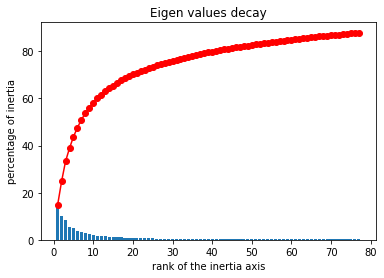

In [17]:
# eigen values 
display_scree_plot(pca)

The first eigen values do not give a percentage we need to have the maximum information.

Even with the 20 first components, we canot resume all the information about the data because with 20 eigen values, we only have 70% of the information. And 20 eigen values are too much.

The first three eigen values give around 34% of the information. This is not enough. They doesn't resume all the information.

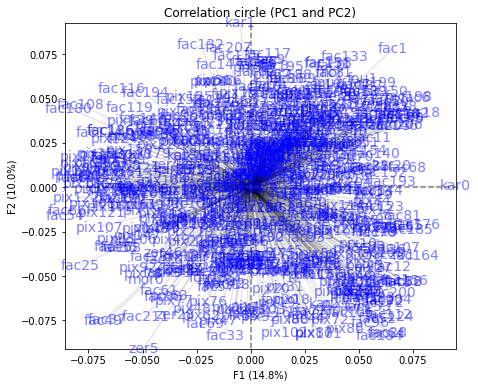

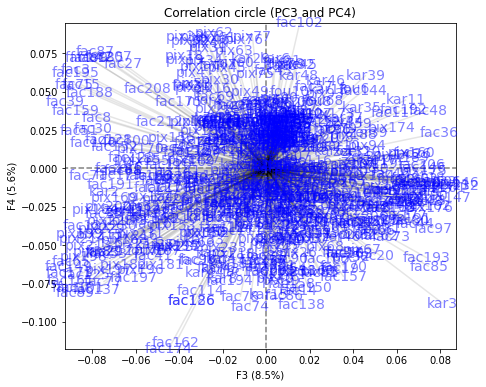

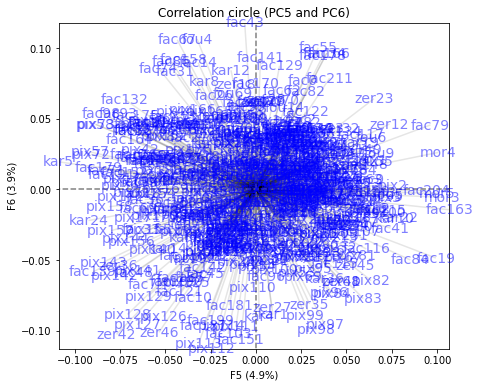

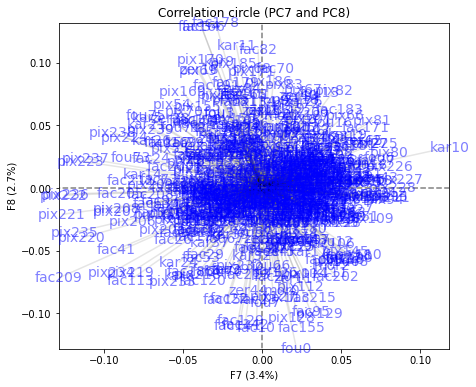

In [18]:
#correlation circle
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1), (2,3), (4,5), (6,7)], labels = np.array(features))

We have too many features that appear on the correlation circle.

The correlation circle is fluzzy! It makes it impossible to interpret!

The first four factorial plans do not allow us to make interpretation because the percentage of the components are not enough.

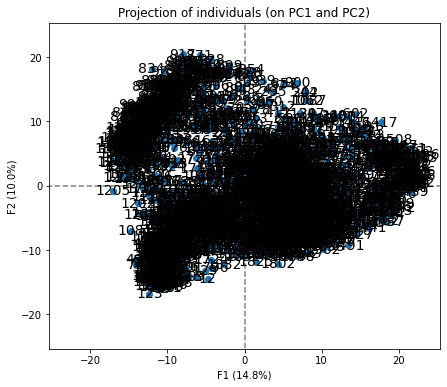

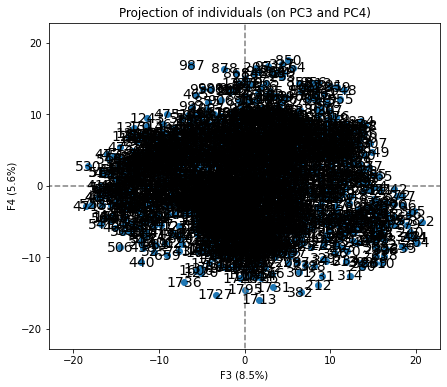

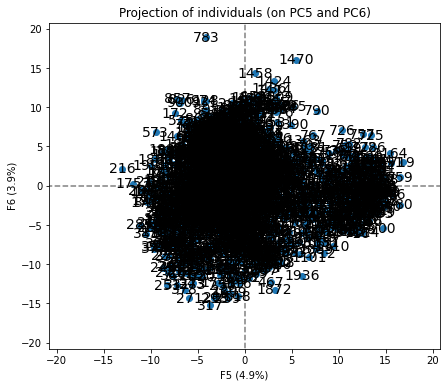

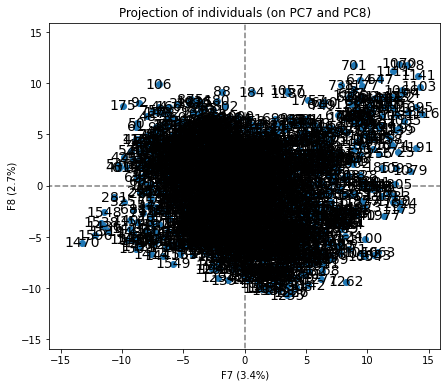

In [19]:
# Let's project the individuals
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1), (2,3), (4,5), (6,7)], labels = np.array(names))

plt.show()

the factorial plans are fluzzy. It is impossible to make interpretation from it.

In [20]:
X_projected.shape

(2000, 77)

In [21]:
pd.DataFrame(X_projected)

0          1          2         3         4         5         6   \
0    -10.792587 -14.217229  -2.735840 -2.498813 -1.183472  7.075655 -2.578779   
1     -8.030707 -13.084227   1.290484 -5.413479 -5.434129  7.035879  0.875896   
2    -11.856732 -12.375021   0.499917 -0.850888 -4.471142  3.153493 -6.135362   
3     -8.377406 -13.201985  -1.619564 -2.736352 -2.866328  2.761106 -1.290269   
4    -11.087021 -10.574100  -0.976119 -6.274910 -2.339075  7.777125  1.281136   
...         ...        ...        ...       ...       ...       ...       ...   
1995   1.769509  -8.680915  10.235653  2.825178  0.665071 -1.597781 -4.233298   
1996   9.287121  -8.811792   5.358049  0.754445  1.015373  2.737964  2.330241   
1997   3.091909  -7.749015   7.409622  7.716558 -4.053819  2.220747  2.002149   
1998   0.014782  -8.775466  12.099608  1.365450 -4.051368 -1.909515  0.013557   
1999  13.018259  -5.329831   0.880183  6.343388 -3.890295  2.526883  3.234954   

            7         8         9   ...        67        68        69  \
0     2.312855 -1.391230  1.417176  ... -1.303088  2.094601 -2.691992   
1     2.192293 -3.160373  1.651192  ...  0.269990 -0.229133  0.334291   
2     6.616403 -4.272699 -1.366273  ...  1.158067 -0.054208  0.304382   
3     6.484547 -3.559916  0.849159  ... -1.845913 -0.047041  1.340680   
4     2.372110 -2.397869 -3.129941  ... -1.812809  0.017222  1.156539   
...        ...       ...       ...  ...       ...       ...       ...   
1995 -4.576577  2.839033 -9.605089  ... -1.244075 -1.445220 -0.628418   
1996  0.712243 -4.391118 -4.845243  ... -0.513087 -1.052808  3.685102   
1997 -8.093719 -0.343461 -5.732554  ... -1.075417  2.157854 -0.144587   
1998 -6.131532 -1.581514 -3.620880  ...  0.286851  0.058187 -0.648589   
1999 -2.952297 -0.684105 -5.691923  ...  0.527959 -1.483582  1.424451   

            70        71        72        73        74        75        76  
0     1.103467 -0.110002 -0.976968 -0.640757  0.430464 -0.952289  1.173199  
1    -0.422464 -1.324763 -0.433526 -0.292144 -0.006525  1.271800  1.223361  
2    -2.564143 -0.350148 -0.761955 -0.628456  0.794688  0.545331 -0.835744  
3     0.289708  0.030581  1.043846  0.097244 -0.890464 -0.124093  1.163668  
4     1.612910  0.058499 -0.609902 -1.633822 -0.928371 -1.260090  0.417216  
...        ...       ...       ...       ...       ...       ...       ...  
1995 -0.973567  1.627421  0.022622 -1.035109 -0.495997  1.015633 -0.668658  
1996 -0.358590 -0.285782  1.128244  0.851691 -0.706533 -0.718960  0.128834  
1997  0.518362  0.398315 -0.743335 -0.406821 -0.736712  1.206036  1.404478  
1998 -0.470177  0.446764 -1.132173 -0.064067  0.839823 -2.462890 -0.699835  
1999  0.636254  1.051800 -0.461424  1.047641 -1.707347 -0.738894 -0.654466  

[2000 rows x 77 columns]

### Clustering for the whole dataset

####Using HAC

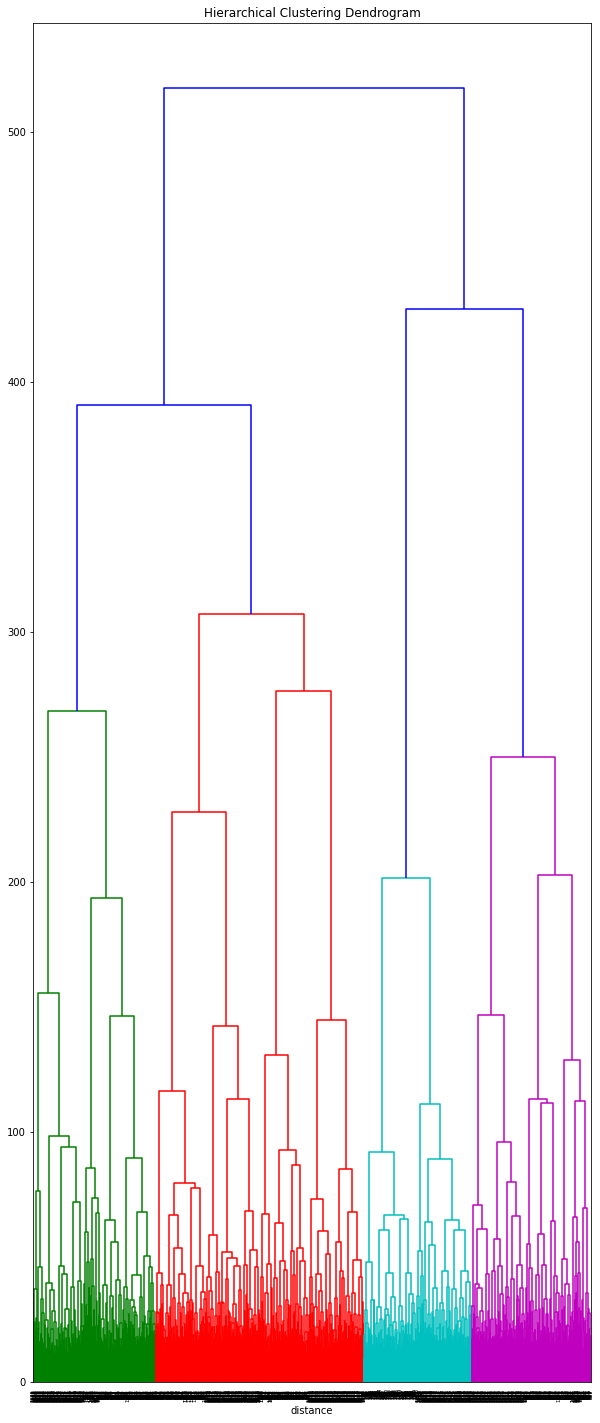

In [22]:
# Clustering hiérarchique
Z = linkage(X_projected, 'ward')

# Affichage du dendrogramme
plot_dendrogram(Z, names)

The dendrogram shows that we can have 4 clusters

#### Using elbow

In [23]:
inertia =[]
for i in range (1,15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
    kmeans.fit(X_projected)
    inertia.append(kmeans.inertia_)

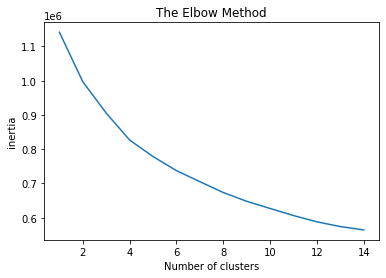

In [24]:

plt.plot(range(1,15),inertia)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.show()

The elbow method also shows that we can have 4 clusters

####Using k-means

In [137]:
# the clusters are well represented with 3 even if elbow and the dendrogram shows 4
n_clust = 3
# Clustering with K-means
km = KMeans(n_clusters=n_clust)
km.fit(X_projected)

KMeans(n_clusters=3)

In [138]:
# Récupération des clusters attribués à chaque individu
clusters = km.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


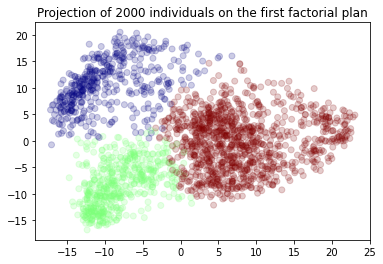

In [139]:
# Affichage du clustering par projection des individus sur le premier plan factoriel
#X_projected = pca.transform(X_scaled)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters.astype(np.float), cmap = 'jet', alpha=.2)
plt.title("Projection of {} individuals on the first factorial plan".format(X_projected.shape[0]))
plt.show(block=False)

### Using the files separately

##### For the Fourier coefficients feature

In [28]:
#We replace unknown values by the mean of the variable
mfeat_fou = mfeat_fou.fillna(mfeat_fou.mean())
X_fou = mfeat_fou.values
# names = mfeat_fou["id"] # or mfeat_fou.index
names = mfeat_fou.index
features = mfeat_fou.columns

In [29]:
print(X_fou.shape)

(2000, 76)


In [30]:
# Standardization (center and reduce)
std_scale = preprocessing.StandardScaler().fit(X_fou)
X_fou_scaled = std_scale.transform(X_fou)

In [31]:
# We compute the covariance
cov_mat = np.cov(X_fou_scaled, rowvar=False)

# Computing eigen values and eigen vectors
eig_val , eig_vect = np.linalg.eigh(cov_mat)

sort_index =  np.argsort(eig_val)[::-1]
sort_eig_val = eig_val[sort_index]
sort_eig_vect = eig_vect[:,sort_index]
total = sum(sort_eig_val)
var_of_features = [(i/total)*100 for i in sort_eig_val]

In [32]:
#var_of_features
#print(eig_val[1])
increment = 0
for i in eig_val:
  if (i>1):
    increment +=1
    print(i)
print(increment)

1.0512629041918278
1.0685844843410588
1.1200334476846936
1.2038108747230762
1.334330160803241
1.3598400234267405
1.445510348545087
1.497393348092235
1.5904593631065358
1.6306384312686546
1.7331894440464268
1.9040655801834112
2.021165970903392
2.1730235875316577
2.431227509888551
2.5369298722287708
2.758026702486198
4.751920397036332
5.191003604761719
11.877394447406067
20


When computing the eigen values of the fourrier coefficients, we notice that the eigen values greater than one are 20 with respect to the kaiser rule.

So 20 will be the number of components we will use.

In [144]:
# choice of the number of components to compute
n_comp_fou = 28

In [145]:
# Let's compute the principal components
pca_fou = decomposition.PCA(n_components = n_comp_fou)
pca_fou.fit(X_fou_scaled)

PCA(n_components=28)

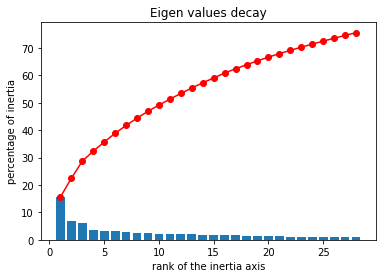

In [146]:
# eigen values 
display_scree_plot(pca_fou)

When choosing 20 components, we don't have the maximum of the informmation. So we increase the number of eigen values and keep 28

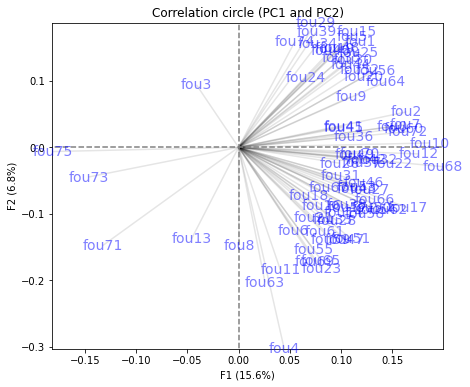

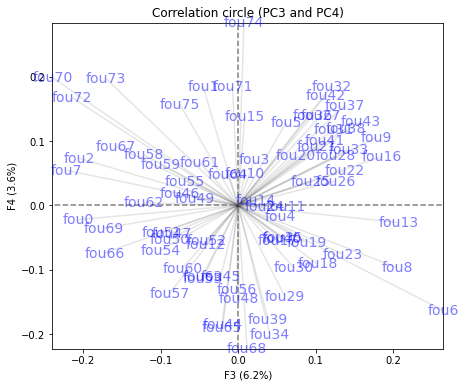

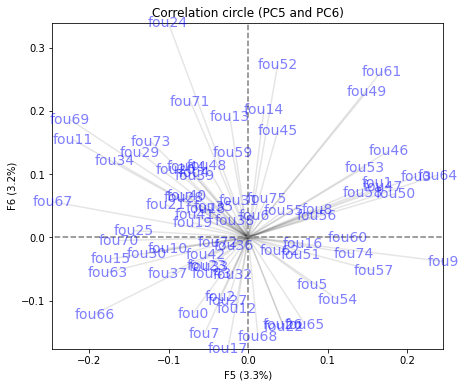

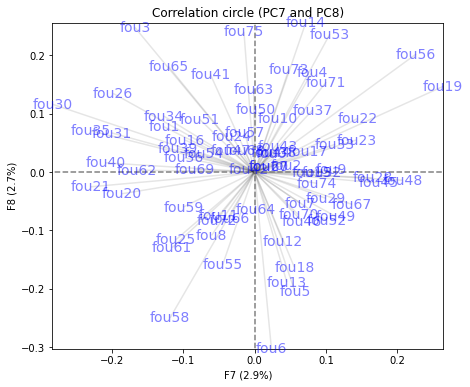

In [36]:
#correlation circle
pcs_fou = pca_fou.components_
display_circles(pcs_fou, n_comp_fou, pca_fou, [(0,1), (2,3), (4,5), (6,7)], labels = np.array(features))

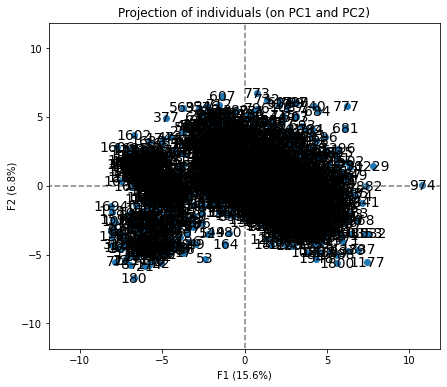

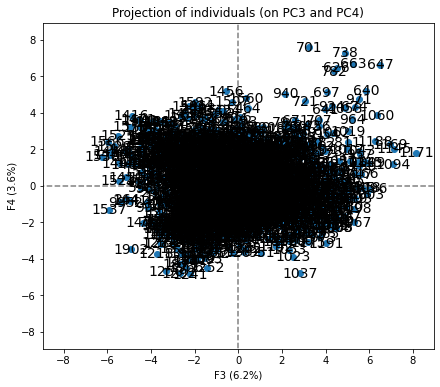

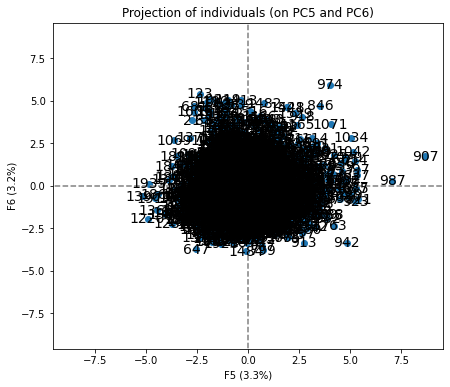

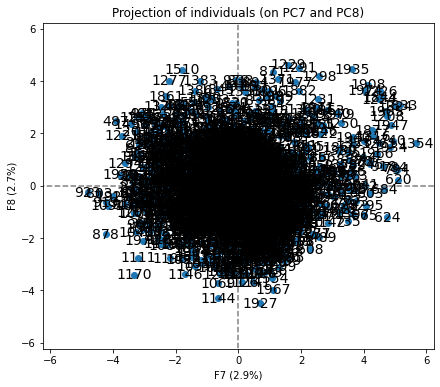

In [37]:
# Let's project the individuals
X_fou_projected = pca_fou.transform(X_fou_scaled)
display_factorial_planes(X_fou_projected, n_comp, pca_fou, [(0,1), (2,3), (4,5), (6,7)], labels = np.array(names))

plt.show()

#### Clustering for the fourier coefficients

#####Using HAC

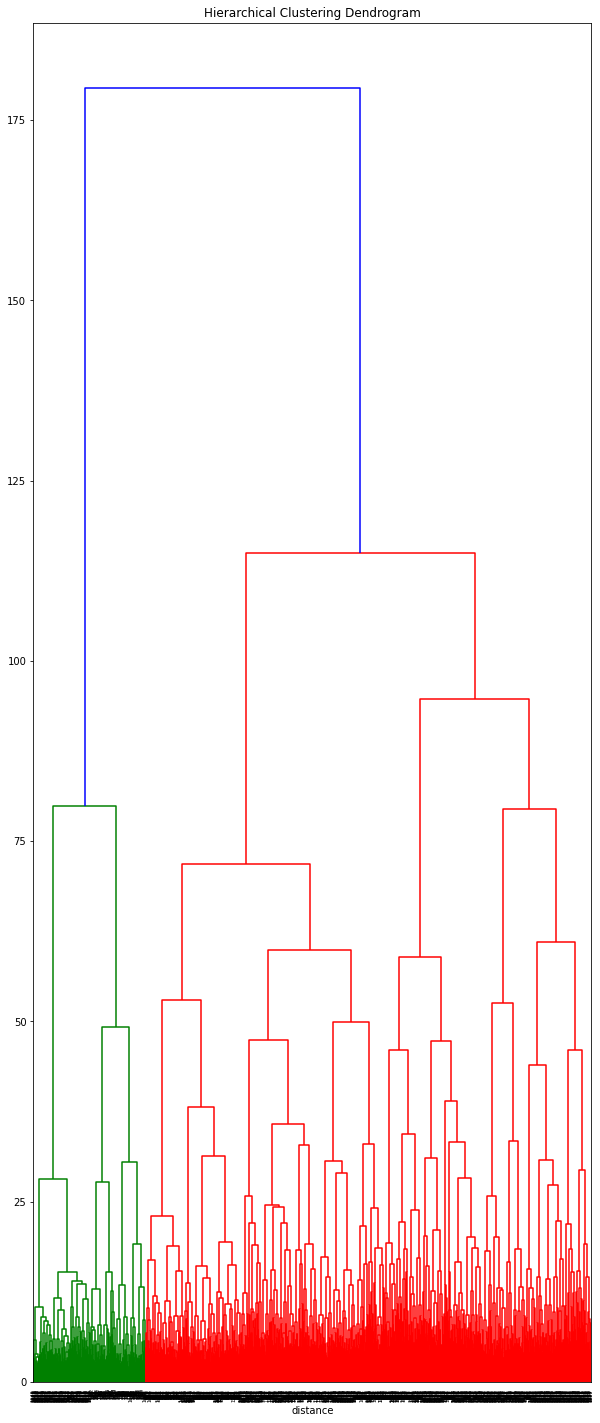

In [39]:
# Clustering hiérarchique
Z_fou = linkage(X_fou_projected, 'ward')

# Affichage du dendrogramme
plot_dendrogram(Z_fou, names)

When cutting the dendrogram, we can have 4 clusters

##### Using elbow

In [40]:
inertia_fou =[]
for i in range (1,15):
    kmeans_fou = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
    kmeans_fou.fit(X_fou_projected)
    inertia_fou.append(kmeans_fou.inertia_)

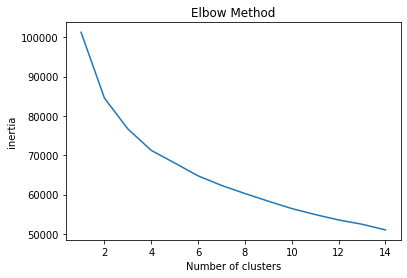

In [41]:

plt.plot(range(1,15),inertia_fou)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.show()

The elbow method shows that we can have 4 clusters

#####Using k-means

In [147]:
#With 3 clusters, we have a better clustering than with 4
n_clust_fou = 3
# Clustering with K-means
km_fou = KMeans(n_clusters=n_clust_fou)
km_fou.fit(X_fou_projected)

KMeans(n_clusters=3)

In [148]:
# Récupération des clusters attribués à chaque individu
clusters_fou = km_fou.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


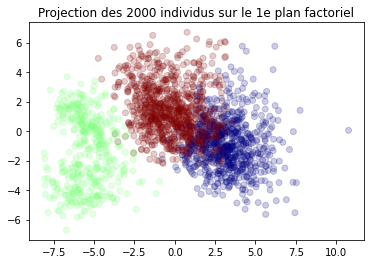

In [149]:
# Let's show clustering by projection of individuals on the first factorial plan
plt.scatter(X_fou_projected[:, 0], X_fou_projected[:, 1], c=clusters_fou.astype(np.float), cmap = 'jet', alpha=.2)
plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_fou_projected.shape[0]))
plt.show(block=False)

#### For the correlation profile feature : mfeat_fac

In [45]:
#We replace unknown values by the mean of the variable
mfeat_fac = mfeat_fac.fillna(mfeat_fac.mean())
X_fac = mfeat_fac.values
# names = mfeat_fac["id"] # or mfeat_fac.index
names = mfeat_fac.index
features = mfeat_fac.columns

In [46]:
print(X_fac.shape)

(2000, 216)


In [47]:
# Standardization (center and reduce)
std_scale = preprocessing.StandardScaler().fit(X_fac)
X_fac_scaled = std_scale.transform(X_fac)

In [48]:
# We compute the covariance
cov_mat = np.cov(X_fac_scaled, rowvar=False)

# Computing eigen values and eigen vectors
eig_val , eig_vect = np.linalg.eigh(cov_mat)

sort_index =  np.argsort(eig_val)[::-1]
sort_eig_val = eig_val[sort_index]
sort_eig_vect = eig_vect[:,sort_index]
total = sum(sort_eig_val)
var_of_features = [(i/total)*100 for i in sort_eig_val]

In [49]:
#var_of_features
#print(eig_val[1])
increment = 0
for i in eig_val:
  if (i>1):
    increment +=1
    print(i)
print(increment)

1.037421967947345
1.1984230265136884
1.2823105920414517
1.3329452169634157
1.6038283588211355
1.7644849450111402
1.9065709502672783
2.273411256335689
2.4032202866214325
2.6500254410750768
2.7574426353725165
3.4387872739442495
3.592091081785214
4.915462765107077
5.588345618338078
6.594171217870618
7.814733411316915
10.929558309057054
12.996911001897722
17.173183500342926
25.829273141080286
32.68664577378128
48.622496788205915
23


When computing the eigen values of the correlation profile features, we notice that the eigen values greater than one are 23 with respect to the kaiser rule.

So 23 will be the number of components we will use.

In [50]:
# choice of the number of components to compute
n_comp_fac = 23

In [51]:
# Let's compute the principal components
pca_fac = decomposition.PCA(n_components = n_comp_fac)
pca_fac.fit(X_fac_scaled)

PCA(n_components=23)

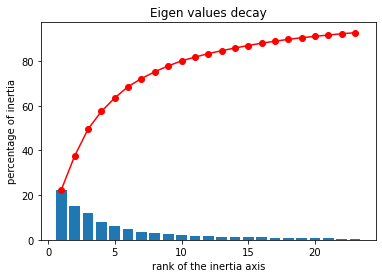

In [52]:
# eigen values 
display_scree_plot(pca_fac)

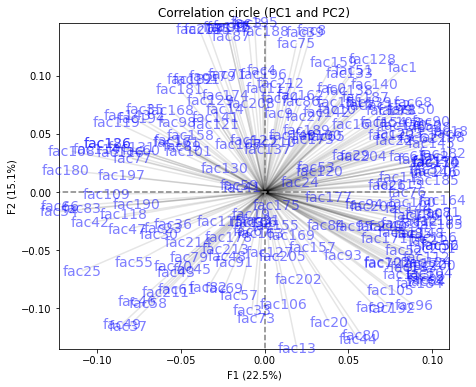

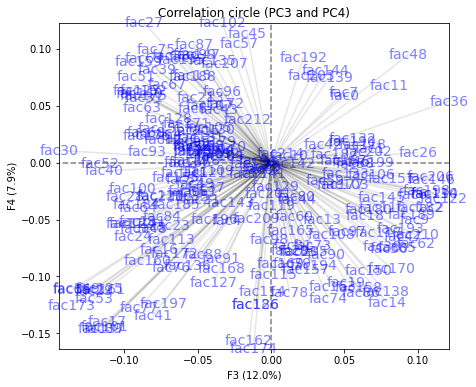

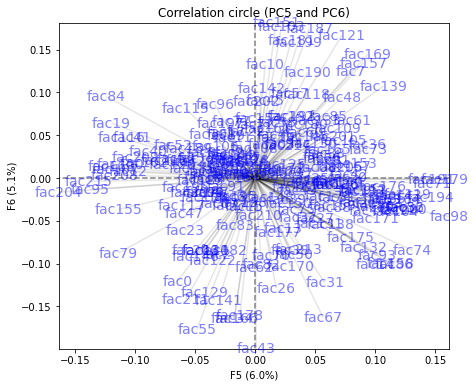

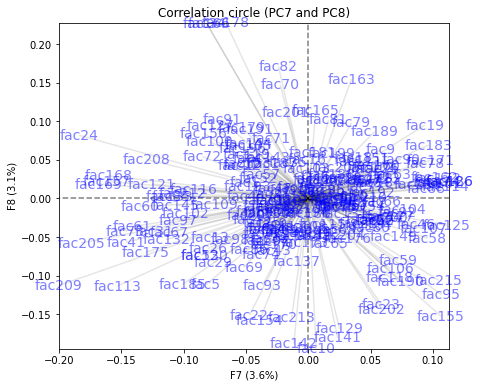

In [53]:
#correlation circle
pcs_fac = pca_fac.components_
display_circles(pcs_fac, n_comp_fac, pca_fac, [(0,1), (2,3), (4,5), (6,7)], labels = np.array(features))

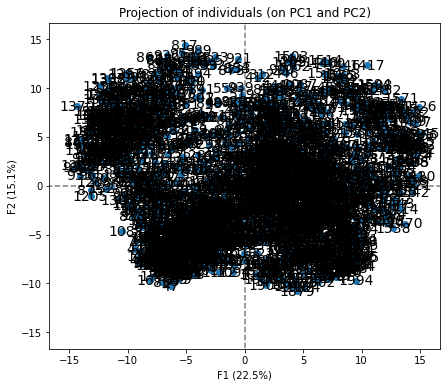

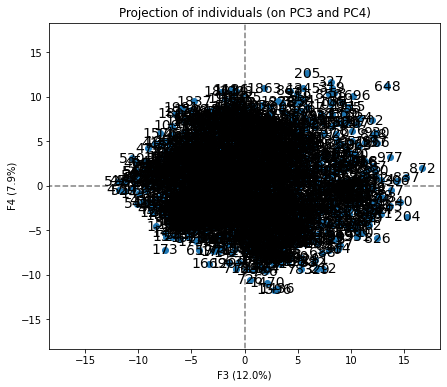

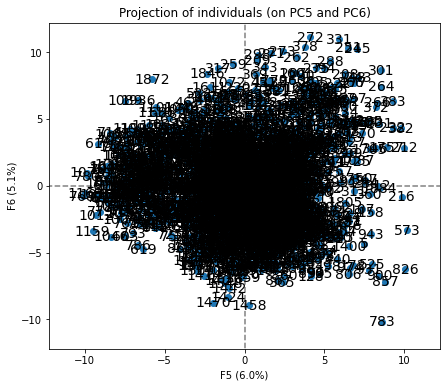

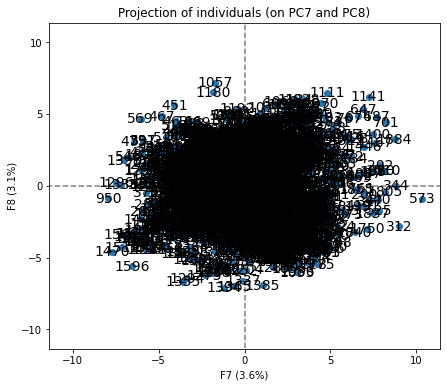

In [54]:
# Let's project the individuals
X_fac_projected = pca_fac.transform(X_fac_scaled)
display_factorial_planes(X_fac_projected, n_comp_fac, pca_fac, [(0,1), (2,3), (4,5), (6,7)], labels = np.array(names))

plt.show()

#### Clustering for the correlation profile feature

#####Using HAC

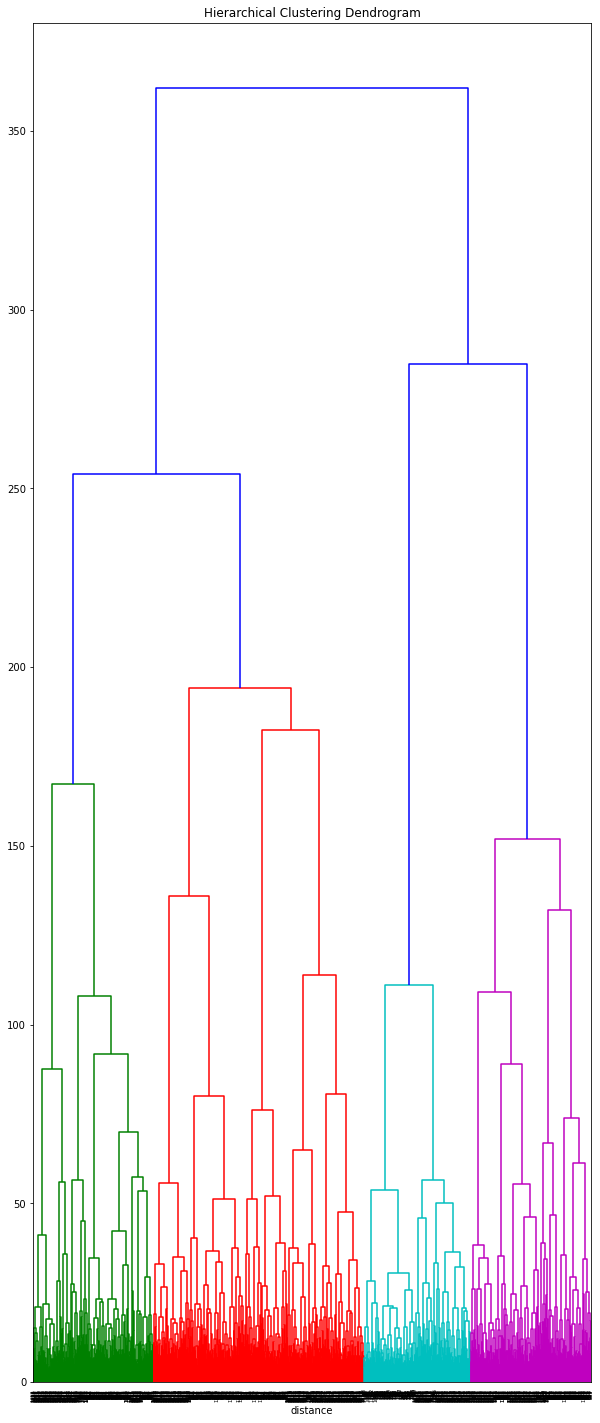

In [55]:
# Hierarchical Clustering
Z_fac = linkage(X_fac_projected, 'ward')

# Display of the dendrogram
plot_dendrogram(Z_fac, names)

The dendrogram shows that we can have 4 clusters

##### Using elbow

In [56]:
inertia_fac =[]
for i in range (1,15):
    kmeans_fac = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
    kmeans_fac.fit(X_fac_projected)
    inertia_fac.append(kmeans_fac.inertia_)

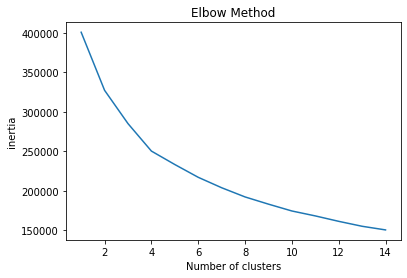

In [57]:

plt.plot(range(1,15),inertia_fac)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.show()

The elbow method shows that we can have 4 clusters. We have a big drop at 4

#####Using k-means

In [150]:
#We have a better result with 3 clusters
n_clust_fac = 3
# Clustering with K-means
km_fac = KMeans(n_clusters=n_clust_fac)
km_fac.fit(X_fac_projected)

KMeans(n_clusters=3)

In [151]:
# Récupération des clusters attribués à chaque individu
clusters_fac = km_fac.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


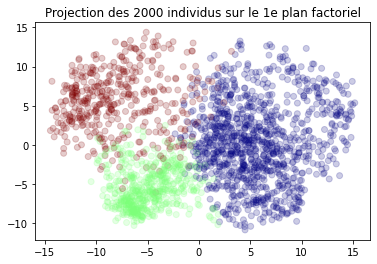

In [152]:
# Let's show clustering by projection of individuals on the first factorial plan
plt.scatter(X_fac_projected[:, 0], X_fac_projected[:, 1], c=clusters_fac.astype(np.float), cmap = 'jet', alpha=.2)
plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_fac_projected.shape[0]))
plt.show(block=False)

#### For the Karhunen-Love coefficients

In [61]:
#We replace unknown values by the mean of the variable
mfeat_kar = mfeat_kar.fillna(mfeat_kar.mean())
X_kar = mfeat_kar.values
# names = mfeat_kar["id"] # or mfeat_kar.index
names = mfeat_kar.index
features = mfeat_kar.columns

In [62]:
print(X_kar.shape)

(2000, 64)


In [63]:
# Standardization (center and reduce)
std_scale = preprocessing.StandardScaler().fit(X_kar)
X_kar_scaled = std_scale.transform(X_kar)

In [64]:
# We compute the covariance
cov_mat = np.cov(X_kar_scaled, rowvar=False)

# Computing eigen values and eigen vectors
eig_val , eig_vect = np.linalg.eigh(cov_mat)

sort_index =  np.argsort(eig_val)[::-1]
sort_eig_val = eig_val[sort_index]
sort_eig_vect = eig_vect[:,sort_index]
total = sum(sort_eig_val)
var_of_features = [(i/total)*100 for i in sort_eig_val]

In [65]:
#var_of_features
#print(eig_val[1])
increment = 0
for i in eig_val:
  if (i>1):
    increment +=1
    print(i)
print(increment)

1.0040843935764834
1.0290727355290321
1.0687717159044097
1.0968572301852337
1.1655661890265254
1.2557405293969544
1.3179399699232794
1.379140652208065
1.4384047401938567
1.4830684105894132
1.5025088805050806
1.7069993452620873
1.910956092188424
2.1114602402776437
2.37324917826849
2.6592819694875094
3.2596101671401683
3.5673287699571645
5.125318155780641
5.858908191866408
20


When computing the eigen values of the Karhunen-Love coefficients, we notice that the eigen values greater than one are 20 with respect to the kaiser rule.

So 20 will be the number of components we will use.

In [163]:
# choice of the number of components to compute
#20 components do not give us the maximum of the information. So we increase it to 27
n_comp_kar = 27

In [164]:
# Let's compute the principal components
pca_kar = decomposition.PCA(n_components = n_comp_kar)
pca_kar.fit(X_kar_scaled)

PCA(n_components=27)

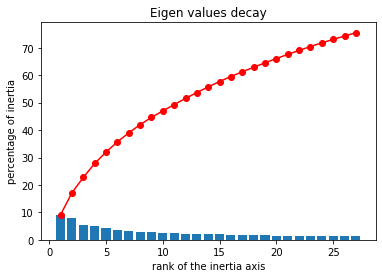

In [165]:
# eigen values 
display_scree_plot(pca_kar)

In [166]:
#correlation circle
# pcs_kar = pca_kar.components_
# display_circles(pcs_kar, n_comp_kar, pca_kar, [(0,1), (2,3), (4,5)], labels = np.array(features))

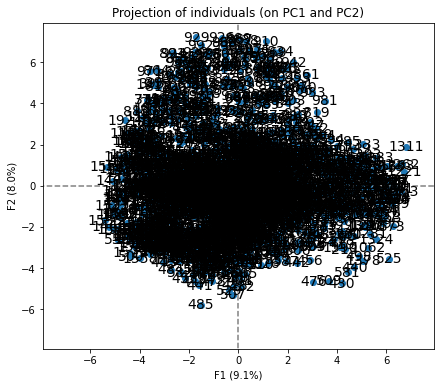

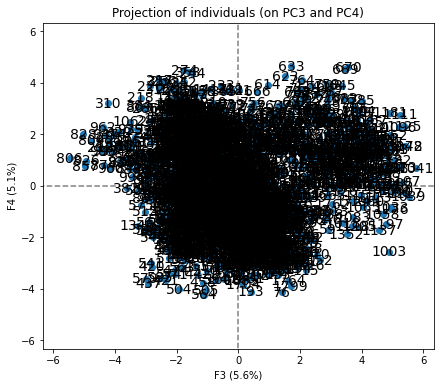

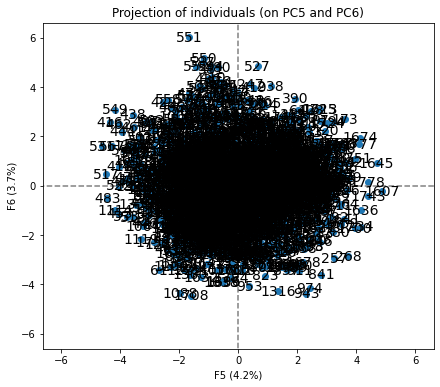

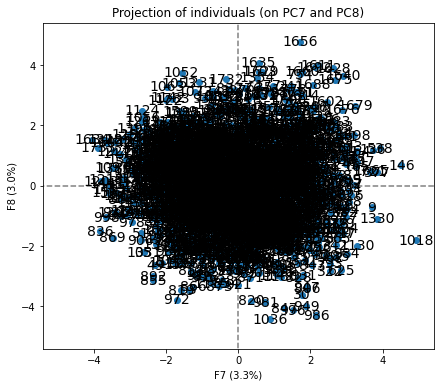

In [167]:
# Let's project the individuals
X_kar_projected = pca_kar.transform(X_kar_scaled)
display_factorial_planes(X_kar_projected, n_comp_kar, pca_kar, [(0,1), (2,3), (4,5), (6,7)], labels = np.array(names))

plt.show()

#### Clustering for Karhunen-Love coefficients

#####Using HAC

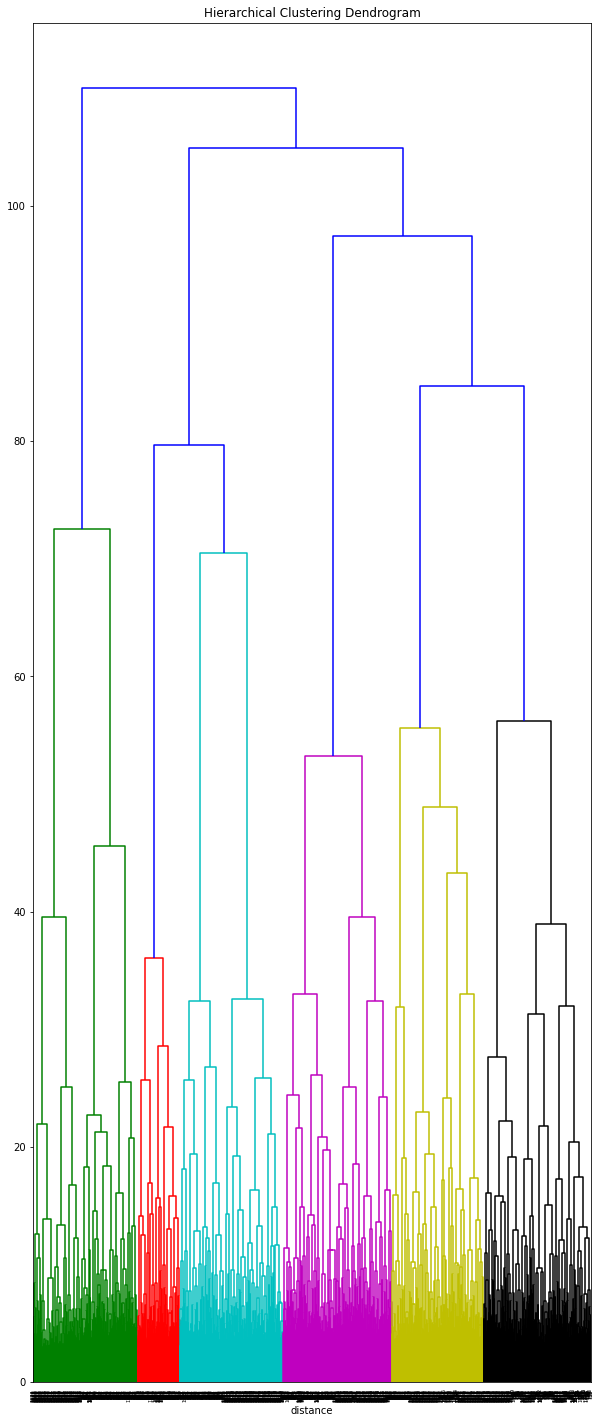

In [71]:
# Clustering hiérarchique
Z_kar = linkage(X_kar_projected, 'ward')

# Affichage du dendrogramme
plot_dendrogram(Z_kar, names)

We can cut the dendrogram into 4 clusters

##### Using elbow

In [72]:
inertia_kar =[]
for i in range (1,15):
    kmeans_kar = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
    kmeans_kar.fit(X_kar_projected)
    inertia_kar.append(kmeans_kar.inertia_)

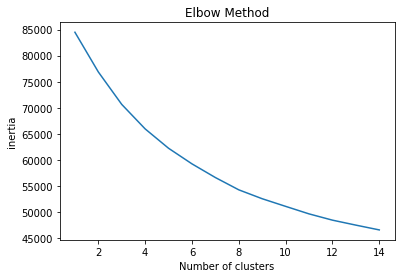

In [73]:

plt.plot(range(1,15),inertia_kar)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.show()

The elbow method shows that we can have 3 clusters

#####Using k-means

In [74]:
n_clust_kar = 3
# Clustering with K-means
km_kar = KMeans(n_clusters=n_clust_kar)
km_kar.fit(X_kar_scaled)

KMeans(n_clusters=3)

In [75]:
# Récupération des clusters attribués à chaque individu
clusters_kar = km_kar.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


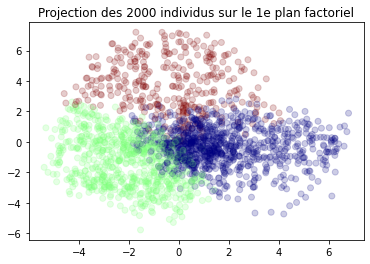

In [76]:
# Let's show clustering by projection of individuals on the first factorial plan
plt.scatter(X_kar_projected[:, 0], X_kar_projected[:, 1], c=clusters_kar.astype(np.float), cmap = 'jet', alpha=.2)
plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_kar_projected.shape[0]))
plt.show(block=False)

#### For the averaged pixel values feature

In [77]:
#We replace unknown values by the mean of the variable
mfeat_pix = mfeat_pix.fillna(mfeat_pix.mean())
X_pix = mfeat_pix.values
# names = mfeat_pix["id"] # or mfeat_pix.index
names = mfeat_pix.index
features = mfeat_pix.columns

In [78]:
print(X_pix.shape)

(2000, 240)


In [79]:
# Standardization (center and reduce)
std_scale = preprocessing.StandardScaler().fit(X_pix)
X_pix_scaled = std_scale.transform(X_pix)

In [80]:
# We compute the covariance
cov_mat = np.cov(X_pix_scaled, rowvar=False)

# Computing eigen values and eigen vectors
eig_val , eig_vect = np.linalg.eigh(cov_mat)

sort_index =  np.argsort(eig_val)[::-1]
sort_eig_val = eig_val[sort_index]
sort_eig_vect = eig_vect[:,sort_index]
total = sum(sort_eig_val)
var_of_features = [(i/total)*100 for i in sort_eig_val]

In [81]:
#var_of_features
#print(eig_val[1])
increment = 0
for i in eig_val:
  if (i>1):
    increment +=1
    print(i)
print(increment)

1.0137185493291252
1.1130669615027877
1.1206818016313158
1.1448071205775054
1.2184551921764397
1.2324293460526956
1.3779304343959182
1.4686733203837645
1.63665445903959
1.8154266985779866
1.8988839949887961
1.9477125107398103
2.1369338513169835
2.4017118706755705
2.483204608928495
2.7227814216942363
2.9415370563077126
3.1476929572621515
3.4614982691446388
3.7341093600416
4.091387602952089
4.427044740153236
4.719452072754406
6.0208398424951675
7.110310971229294
7.229345307960402
8.966266281623678
10.247959739921006
13.077943450124927
15.149441811405925
21.081470803004972
23.44590070371065
38.730757856100425
33


When computing the eigen values of the averaged pixel values features, we notice that the eigen values greater than one are 33 with respect to the kaiser rule.

So 33 will be the number of components we will use.

In [168]:
# choice of the number of components to compute
n_comp_pix = 33

In [169]:
# Let's compute the principal components
pca_pix = decomposition.PCA(n_components = n_comp_pix)
pca_pix.fit(X_pix_scaled)

PCA(n_components=33)

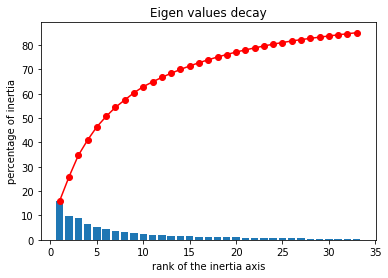

In [170]:
# eigen values 
display_scree_plot(pca_pix)

In [172]:
#correlation circle
# pcs_pix = pca_pix.components_
# display_circles(pcs_pix, n_comp_pix, pca_pix, [(0,1), (2,3), (4,5), (6,7)], labels = np.array(features))

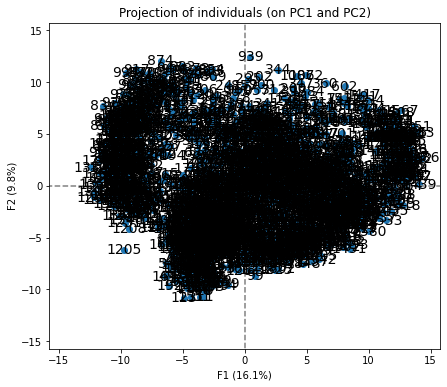

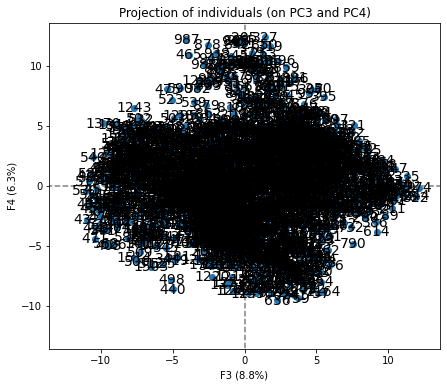

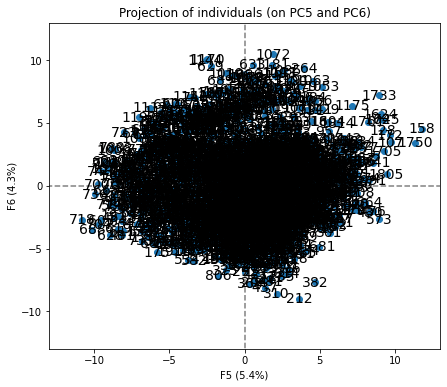

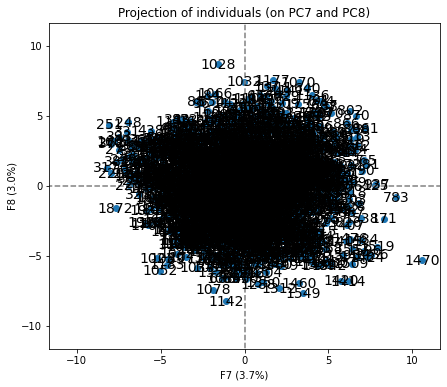

In [173]:
# Let's project the individuals
X_pix_projected = pca_pix.transform(X_pix_scaled)
display_factorial_planes(X_pix_projected, n_comp_pix, pca_pix, [(0,1), (2,3), (4,5), (6,7)], labels = np.array(names))

plt.show()

#### Clustering for averaged pixel values feature

#####Using HAC

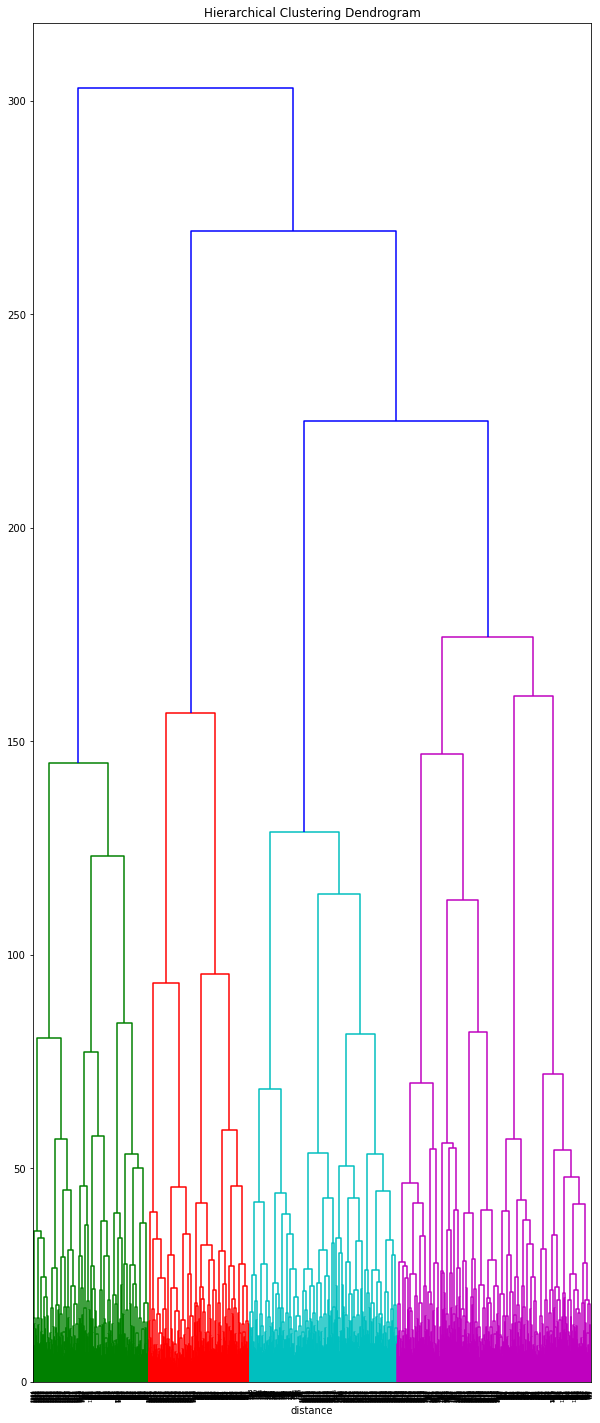

In [87]:
# Clustering hiérarchique
Z_pix = linkage(X_pix_projected, 'ward')

# Affichage du dendrogramme
plot_dendrogram(Z_pix, names)

The dendrogram shows that we can have 4 clusters

##### Using elbow

In [88]:
inertia_pix =[]
for i in range (1,15):
    kmeans_pix = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
    kmeans_pix.fit(X_pix_projected)
    inertia_pix.append(kmeans_pix.inertia_)

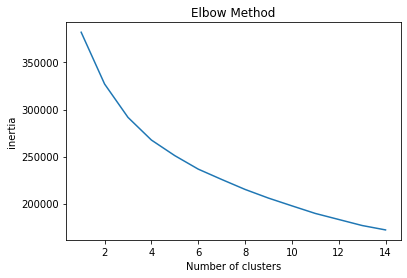

In [89]:

plt.plot(range(1,15),inertia_pix)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.show()

The elbow method shows that we can have 3 clusters

#####Using k-means

In [174]:
n_clust_pix = 3
# Clustering with K-means
km_pix = KMeans(n_clusters=n_clust_pix)
km_pix.fit(X_pix_scaled)

KMeans(n_clusters=3)

In [175]:
# Récupération des clusters attribués à chaque individu
clusters_pix = km_pix.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


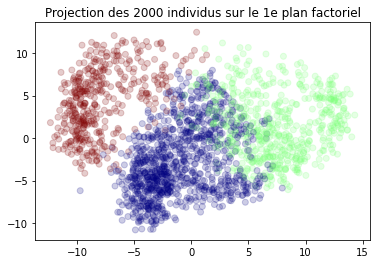

In [176]:
# Let's show clustering by projection of individuals on the first factorial plan
plt.scatter(X_pix_projected[:, 0], X_pix_projected[:, 1], c=clusters_pix.astype(np.float), cmap = 'jet', alpha=.2)
plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_pix_projected.shape[0]))
plt.show(block=False)

#### For the Zernike moments

In [93]:
#We replace unknown values by the mean of the variable
mfeat_zer = mfeat_zer.fillna(mfeat_zer.mean())
X_zer = mfeat_zer.values
# names = mfeat_zer["id"] # or mfeat_zer.index
names = mfeat_zer.index
features = mfeat_zer.columns

In [94]:
print(X_zer.shape)

(2000, 47)


In [181]:
# Standardization (center and reduce)
std_scale = preprocessing.StandardScaler().fit(X_zer)
X_zer_scaled = std_scale.transform(X_zer)

In [182]:
# We compute the covariance
cov_mat = np.cov(X_zer_scaled, rowvar=False)

# Computing eigen values and eigen vectors
eig_val , eig_vect = np.linalg.eigh(cov_mat)

sort_index =  np.argsort(eig_val)[::-1]
sort_eig_val = eig_val[sort_index]
sort_eig_vect = eig_vect[:,sort_index]
total = sum(sort_eig_val)
var_of_features = [(i/total)*100 for i in sort_eig_val]

In [184]:
#var_of_features
#print(eig_val[1])
increment = 0
for i in eig_val:
  if (i>1):
    increment +=1
    print(i)
print("number of eigen values > 1: ",increment)

1.081432334178369
1.2210030000247118
1.3664563821811242
1.5647488982555697
1.7289261614093108
2.3732348705301423
2.9074733960313655
3.861055058156144
4.584834399591706
8.749358109582571
12.23647252515241
number of eigen values > 1:  11


When computing the eigen values of the zernike moments, we notice that the eigen values greater than one are 11 with respect to the kaiser rule.

So 11 will be the number of components we will use.

In [185]:
# choice of the number of components to compute
n_comp_zer = 11

In [186]:
# Let's compute the principal components
pca_zer = decomposition.PCA(n_components = n_comp_zer)
pca_zer.fit(X_zer_scaled)

PCA(n_components=11)

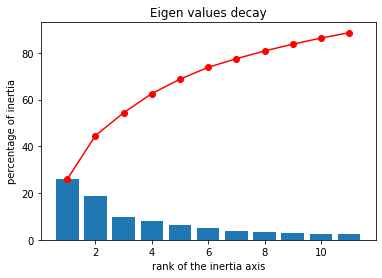

In [187]:
# eigen values 
display_scree_plot(pca_zer)

In [189]:
#correlation circle
# pcs_zer = pca_zer.components_
# display_circles(pcs_zer, n_comp_zer, pca_zer, [(0,1), (2,3), (4,5), (6,7)], labels = np.array(features))

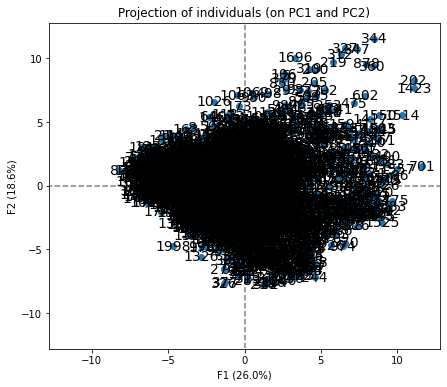

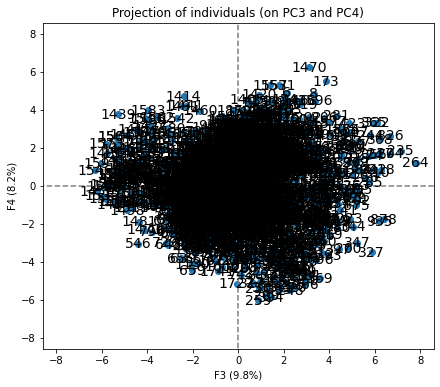

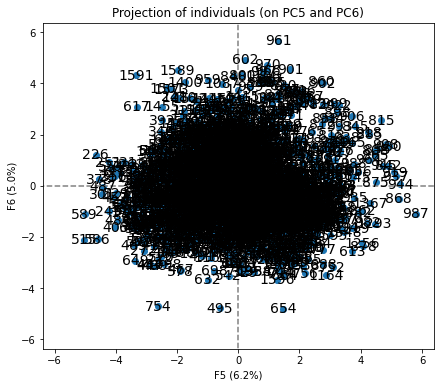

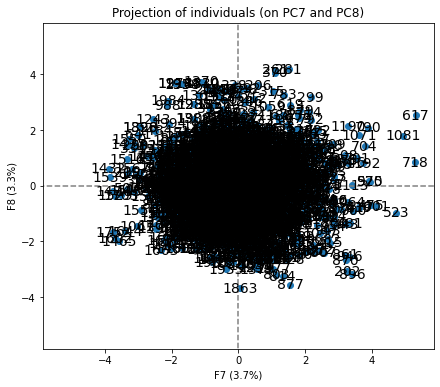

In [190]:
# Let's project the individuals
X_zer_projected = pca_zer.transform(X_zer_scaled)
display_factorial_planes(X_zer_projected, n_comp_zer, pca_zer, [(0,1), (2,3), (4,5), (6,7)], labels = np.array(names))

plt.show()

#### Clustering for the Zernike moments

#####Using HAC

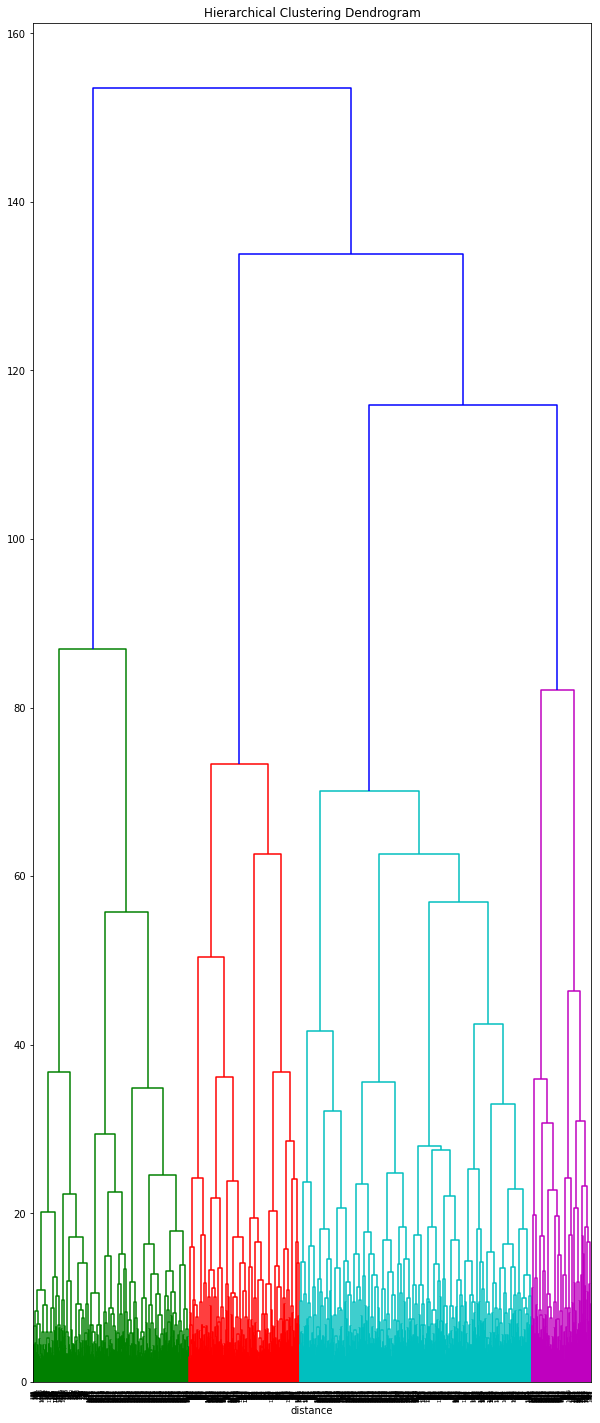

In [103]:
# Clustering hiérarchique
Z_zer = linkage(X_zer_projected, 'ward')

# Affichage du dendrogramme
plot_dendrogram(Z_zer, names)

The dendrogram shows that we can have 4 clusters

##### Using elbow

In [104]:
inertia_zer =[]
for i in range (1,15):
    kmeans_zer = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
    kmeans_zer.fit(X_zer_projected)
    inertia_zer.append(kmeans_zer.inertia_)

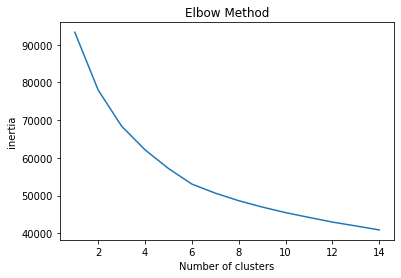

In [105]:

plt.plot(range(1,15),inertia_zer)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.show()

The elbow method shows that we can have 3 clusters

#####Using k-means

In [197]:
n_clust_zer = 3
# Clustering with K-means
km_zer = KMeans(n_clusters=n_clust_zer)
km_zer.fit(X_zer_scaled)

KMeans(n_clusters=3)

In [198]:
# Récupération des clusters attribués à chaque individu
clusters_zer = km_zer.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


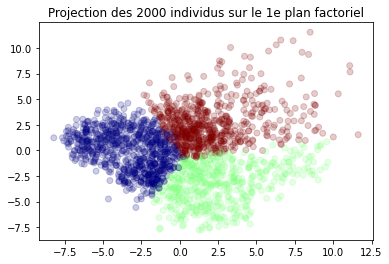

In [199]:
# Let's show clustering by projection of individuals on the first factorial plan
plt.scatter(X_zer_projected[:, 0], X_zer_projected[:, 1], c=clusters_zer.astype(np.float), cmap = 'jet', alpha=.2)
plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_zer_projected.shape[0]))
plt.show(block=False)

#### For the morphology features

In [200]:
#We replace unknown values by the mean of the variable
mfeat_mor = mfeat_mor.fillna(mfeat_mor.mean())
X_mor = mfeat_mor.values
# names = mfeat_mor["id"] # or mfeat_mor.index
names = mfeat_mor.index
features = mfeat_mor.columns

In [201]:
print(X_mor.shape)

(2000, 6)


In [202]:
# Standardization (center and reduce)
std_scale = preprocessing.StandardScaler().fit(X_mor)
X_mor_scaled = std_scale.transform(X_mor)

In [203]:
# We compute the covariance
cov_mat = np.cov(X_mor_scaled, rowvar=False)

# Computing eigen values and eigen vectors
eig_val , eig_vect = np.linalg.eigh(cov_mat)

sort_index =  np.argsort(eig_val)[::-1]
sort_eig_val = eig_val[sort_index]
sort_eig_vect = eig_vect[:,sort_index]
total = sum(sort_eig_val)
var_of_features = [(i/total)*100 for i in sort_eig_val]

In [204]:
#var_of_features
#print(eig_val[1])
increment = 0
for i in eig_val:
  if (i>1):
    increment +=1
    print(i)
print(increment)

1.1344725902731927
4.127650105250559
2


When computing the eigen values of the morphology features, we notice that the eigen values greater than one are 2 with respect to the kaiser rule.

So 2 will be the number of components we will use.

In [209]:
# choice of the number of components to compute
n_comp_mor = 2

In [210]:
# Let's compute the principal components
pca_mor = decomposition.PCA(n_components = n_comp_mor)
pca_mor.fit(X_mor_scaled)

PCA(n_components=2)

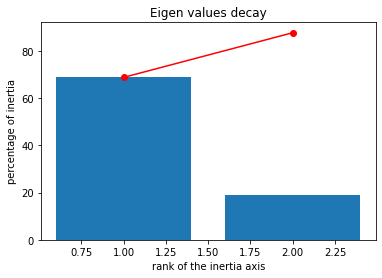

In [211]:
# eigen values 
display_scree_plot(pca_mor)

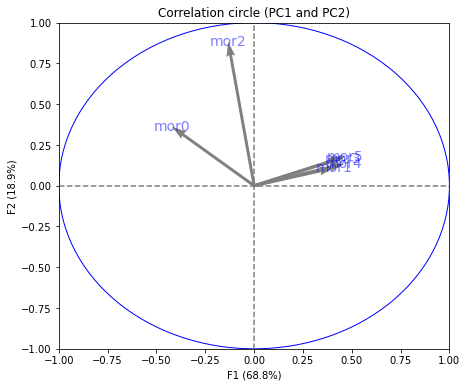

In [214]:
#correlation circle
pcs_mor = pca_mor.components_
display_circles(pcs_mor, n_comp_mor, pca_mor, [(0,1)], labels = np.array(features))

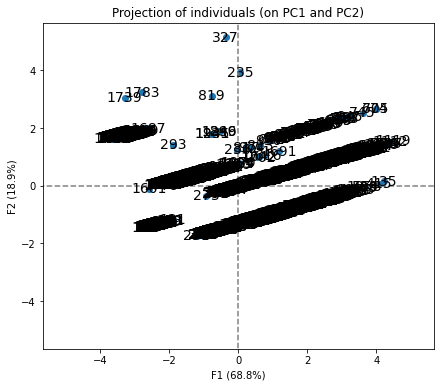

In [216]:
# Let's project the individuals
X_mor_projected = pca_mor.transform(X_mor_scaled)
display_factorial_planes(X_mor_projected, n_comp_mor, pca_mor, [(0,1)], labels = np.array(names))

plt.show()

#### Clustering for the morphology features

#####Using HAC

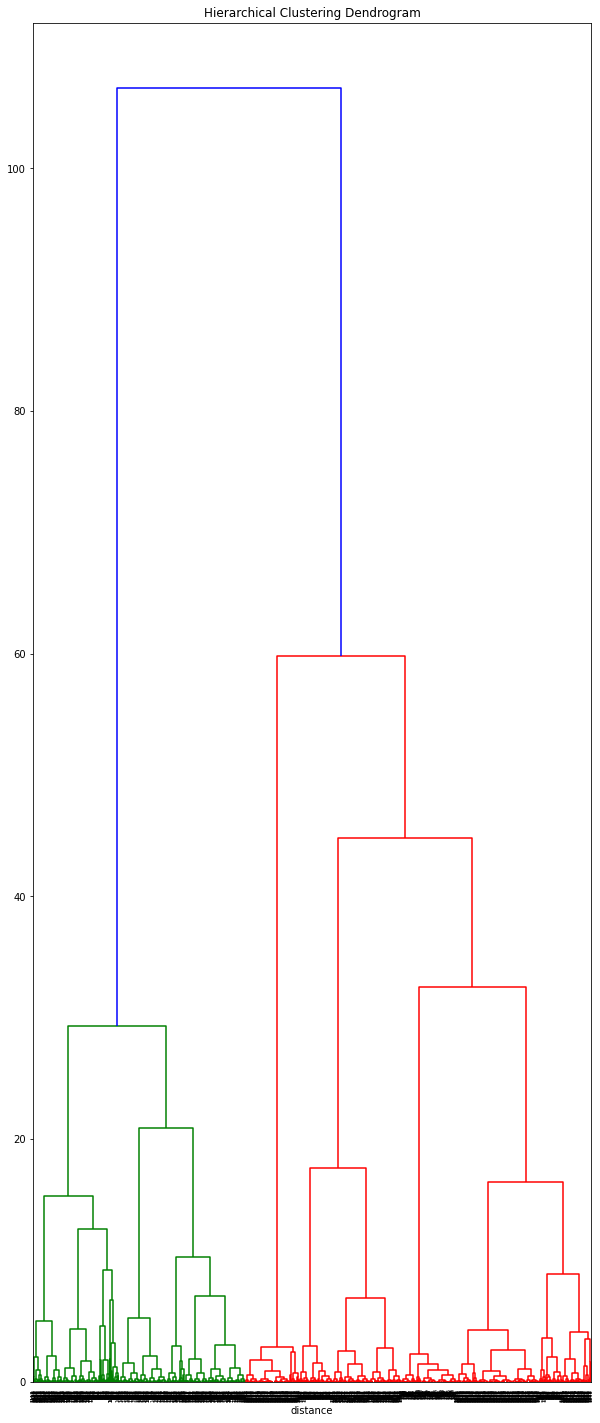

In [217]:
# Clustering hiérarchique
Z_mor = linkage(X_mor_projected, 'ward')

# Affichage du dendrogramme
plot_dendrogram(Z_mor, names)

The dendrogram shows that we can have 3 clusters

##### Using elbow

In [218]:
inertia_mor =[]
for i in range (1,15):
    kmeans_mor = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
    kmeans_mor.fit(X_mor_projected)
    inertia_mor.append(kmeans_mor.inertia_)

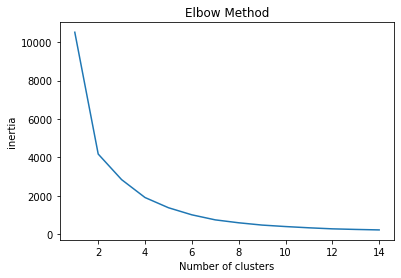

In [219]:

plt.plot(range(1,15),inertia_mor)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.show()

The elbow method shows that we can have 2 clusters

#####Using k-means

In [239]:
n_clust_mor = 2
# Clustering with K-means
km_mor = KMeans(n_clusters=n_clust_mor)
km_mor.fit(X_mor_scaled)

KMeans(n_clusters=2)

In [240]:
# Récupération des clusters attribués à chaque individu
clusters_mor = km_mor.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


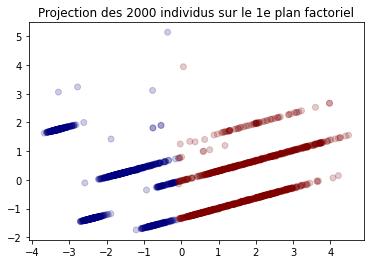

In [241]:
# Let's show clustering by projection of individuals on the first factorial plan
plt.scatter(X_mor_projected[:, 0], X_mor_projected[:, 1], c=clusters_mor.astype(np.float), cmap = 'jet', alpha=.2)
plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_mor_projected.shape[0]))
plt.show(block=False)

## Supervised mining